# Nguyễn Mạnh Khang
# 223030635

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-v0_8-white')

In [3]:
df = pd.read_csv(r"E:\Download_Chrome\data\Default.csv")
df.head()


,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
df['student2'] = df['student'].factorize()[0]

df['default2'] = df['default'].factorize()[0]

df = df.drop(['default', 'student'], axis=1)

df.head()

,Unnamed: 0,balance,income,student2,default2
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,1,0
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


In [5]:
x = df['balance']
x = x / x.max()

y = df['default2']

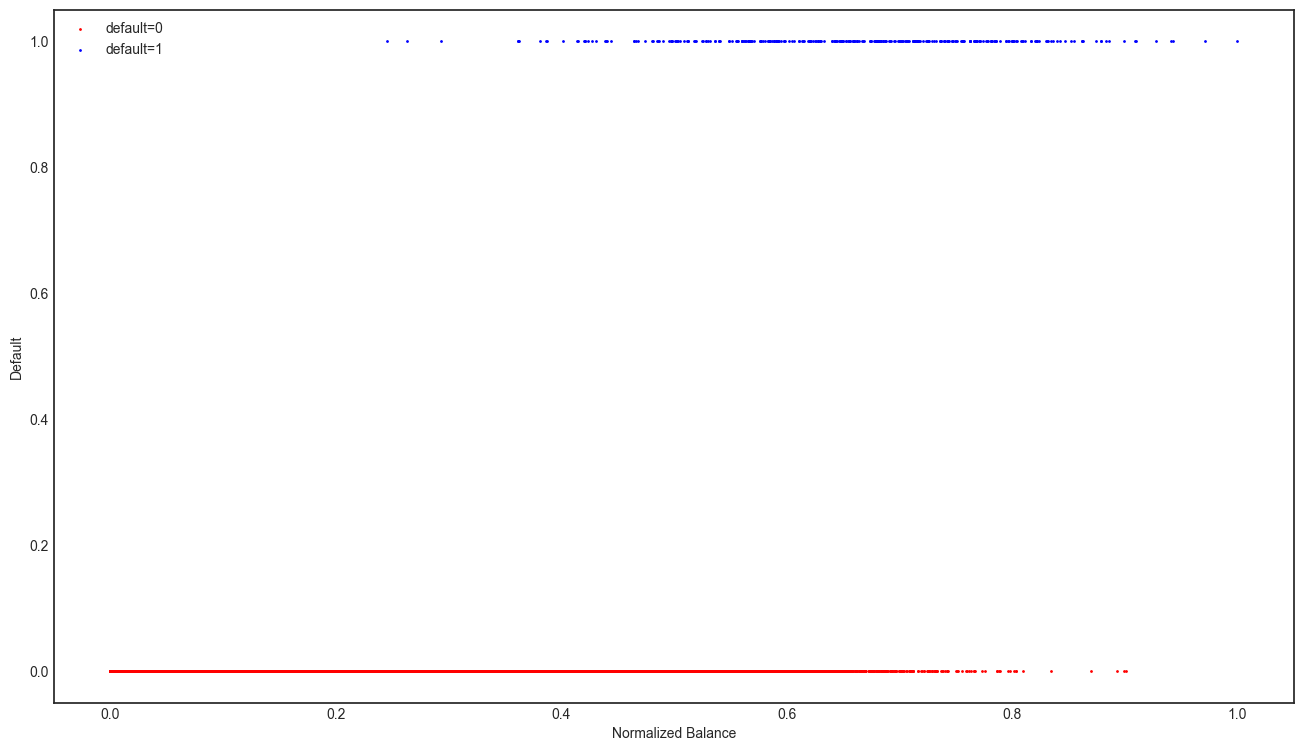

In [6]:
plt.figure(figsize=(16, 9))

id0 = y == 0
id1 = y == 1

plt.scatter(x[id0], y[id0], c='red', s=1, label='default=0')
plt.scatter(x[id1], y[id1], c='blue', s=1, label='default=1')

plt.xlabel('Normalized Balance')
plt.ylabel('Default')
plt.legend()
plt.show()

In [7]:
x=x.values.reshape(-1,1)
x.shape

(10000, 1)

In [8]:
model = LogisticRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_[0])

[-8.80925348]
[11.50214647]


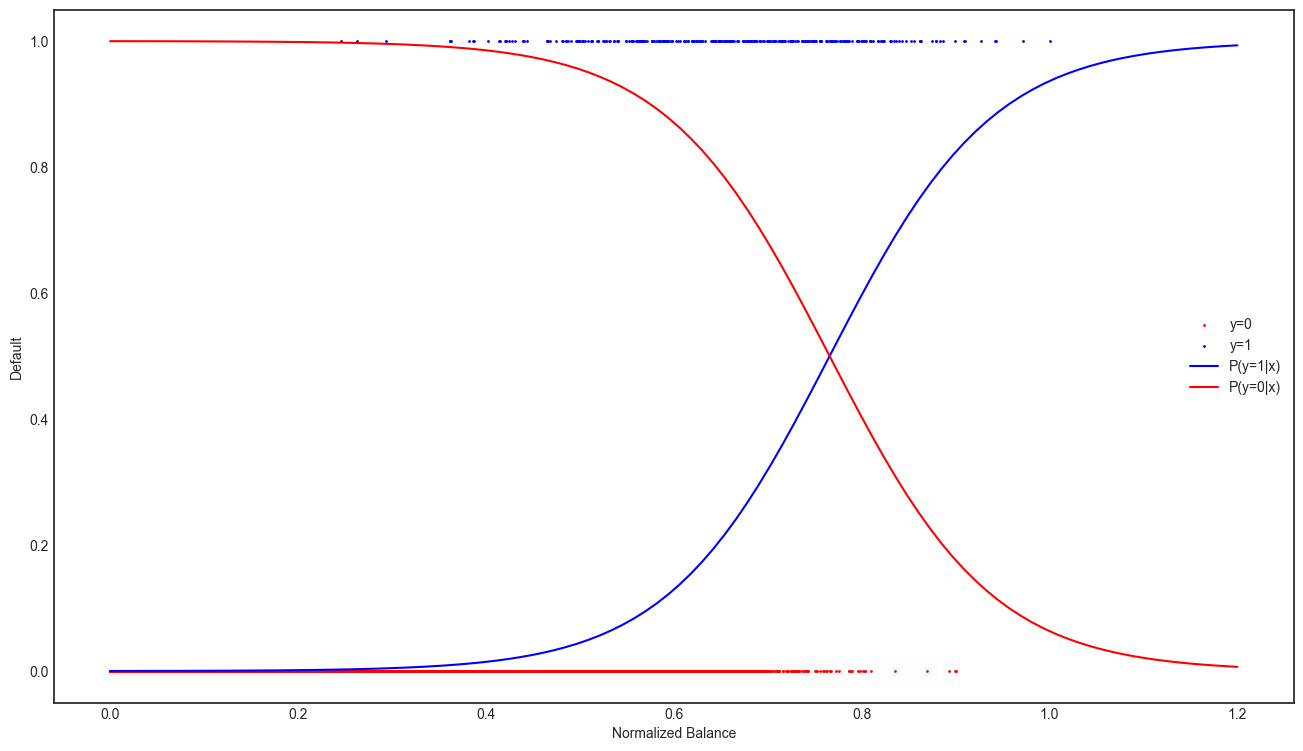

In [9]:
plt.figure(figsize=(16,9))

id0 = y == 0
id1 = y == 1

plt.scatter(x[id0], y[id0], c='red', s=1, label='y=0')
plt.scatter(x[id1], y[id1], c='blue', s=1, label='y=1')

xx = np.linspace(0, 1.2, 100).reshape(-1, 1)

yy = 1 / (1 + np.exp(-(model.intercept_[0] + model.coef_[0][0] * xx)))

plt.plot(xx, yy, c='blue', label='P(y=1|x)')
plt.plot(xx, 1-yy, c='red', label='P(y=0|x)')

plt.xlabel('Normalized Balance')
plt.ylabel('Default')
plt.legend(loc='best')
plt.show()

In [10]:
y_pred=model.predict(x)

In [11]:
confusion_matrix(y, y_pred)

array([[9647,   20],
       [ 262,   71]])

<Figure size 800x800 with 0 Axes>

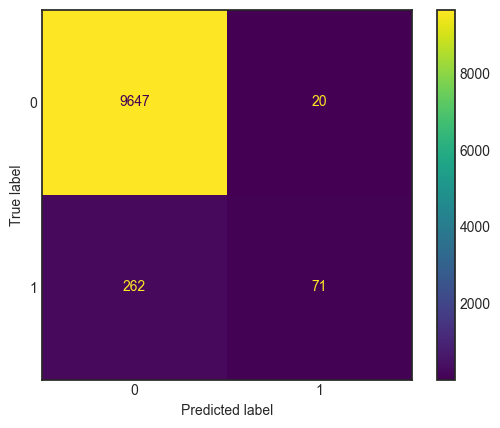

In [12]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(model,x,y)
plt.show()

In [13]:
pred_prob = model.predict_proba(x)

In [14]:
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y, pred_prob[:,1], pos_label=1)

In [15]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y, pred_prob[:,1])
auc_score

0.9479784946837808

In [16]:
random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

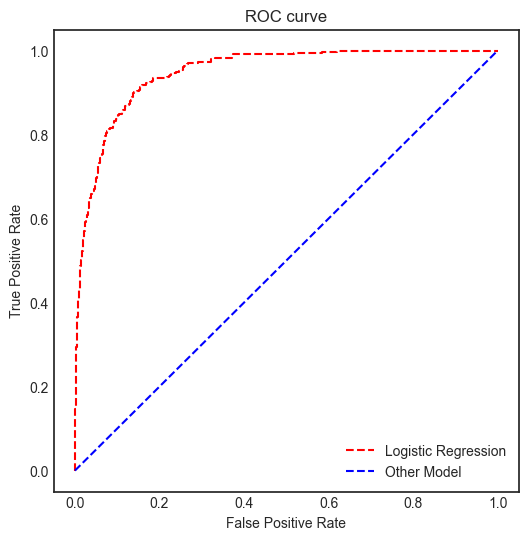

In [17]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, linestyle='--', color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label='Other Model')  

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='best')

plt.show()

In [18]:
pred_prob = model.predict_proba(x)[:,1]

In [19]:
cut_off=np.linspace(0,1,11)
cut_off

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [20]:
CM=[]
for cutpoint in cut_off:
    y_pred=pred_prob>=cutpoint
    cm=confusion_matrix(y, y_pred)
    CM.append(cm.flatten())

In [21]:
df=pd.DataFrame(CM,columns=['TP','FN','FP','TN'])
df

,TP,FN,FP,TN
0,0,9667,0,333
1,9089,578,85,248
2,9436,231,141,192
3,9577,90,195,138
4,9625,42,233,100
5,9647,20,262,71
6,9658,9,293,40
7,9663,4,312,21
8,9664,3,325,8
9,9667,0,331,2


In [22]:
df['TPR'] = df['TP'] / (df['TP'] + df['FN'])
df['FPR'] = df['FP'] / (df['FP'] + df['TN'])

In [23]:
df

,TP,FN,FP,TN,TPR,FPR
0,0,9667,0,333,0.000000,0.000000
1,9089,578,85,248,0.940209,0.255255
2,9436,231,141,192,0.976104,0.423423
3,9577,90,195,138,0.990690,0.585586
4,9625,42,233,100,0.995655,0.699700
5,9647,20,262,71,0.997931,0.786787
6,9658,9,293,40,0.999069,0.879880
7,9663,4,312,21,0.999586,0.936937
8,9664,3,325,8,0.999690,0.975976
9,9667,0,331,2,1.000000,0.993994


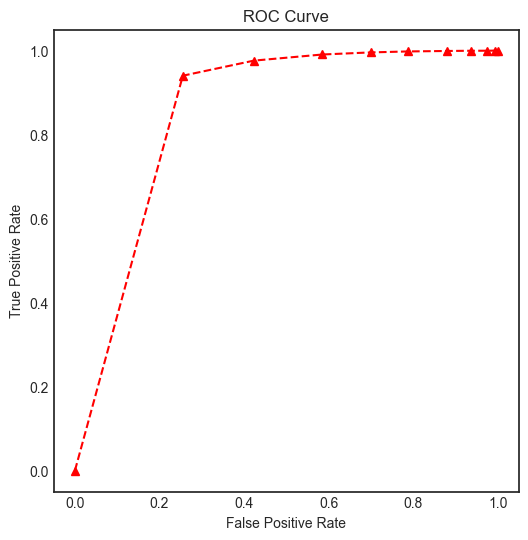

In [24]:
plt.figure(figsize=(6,6))
plt.plot(df['FPR'], df['TPR'], marker='^', c='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
df = pd.read_csv(r"E:\Download_Chrome\data\Default.csv")
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [27]:
df['student2'] = df['student'].factorize()[0]
df['default2'] = df['default'].factorize()[0]

df = df.drop(['default', 'student'], axis=1)

df.head(3)

,Unnamed: 0,balance,income,student2,default2
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,1,0
2,3,1073.549164,31767.138947,0,0


In [28]:
X = df[['balance', 'income', 'student2']].values
y = df['default2'].values

print(X.shape, y.shape)

(10000, 3) (10000,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [30]:
model = LogisticRegression().fit(X_train, y_train)

In [31]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [-11.10816439]
Coefficients: [[ 5.78857147e-03  5.82361683e-06 -4.67458505e-01]]


In [32]:
feature_names = ['balance', 'income', 'student2']

coef = model.coef_[0]
intercept = model.intercept_[0]

logit_eq = "logit(p) = {:.3f}".format(intercept)
for i, c in enumerate(coef):
    logit_eq += " + ({:.3f} * {})".format(c, feature_names[i])
print("Phương trình hồi quy logistic:", logit_eq)

Phương trình hồi quy logistic: logit(p) = -11.108 + (0.006 * balance) + (0.000 * income) + (-0.467 * student2)


In [33]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

result = pd.DataFrame(X_test, columns=['balance', 'income', 'student2'])

result['P(default=0)'] = y_proba[:, 0]
result['P(default=1)'] = y_proba[:, 1]
result['Predict'] = y_pred
result['Actual'] = y_test

result.head(10)

,balance,income,student2,P(default=0),P(default=1),Predict,Actual
0,1435.662933,31507.089277,0.0,0.931773,0.068227,0,0
1,771.789347,42139.070269,0.0,0.998333,0.001667,0,0
2,0.000000,21809.218509,0.0,0.999983,0.000017,0,0
3,113.571264,32803.832648,0.0,0.999965,0.000035,0,0
4,1358.132472,49903.597081,0.0,0.950542,0.049458,0,0
5,1302.553499,32235.052450,0.0,0.967090,0.032910,0,0
6,1763.579088,46227.074542,0.0,0.652569,0.347431,0,1
7,857.329142,25742.173767,0.0,0.997516,0.002484,0,0
8,1366.725774,35425.512077,0.0,0.952142,0.047858,0,0
9,1118.701039,21848.442900,1.0,0.993123,0.006877,0,1


In [34]:
print(round(model.score(X_train, y_train),4), round(model.score(X_test, y_test),4))

0.9734 0.9733


In [35]:
p_test = model.predict_proba(X_test)[:, 1]
p_train = model.predict_proba(X_train)[:, 1]

In [36]:
cut_off = np.linspace(0, 1, 11)

CM_test = []
CM_train = []

for cutpoint in cut_off:
    y_test_pred = p_test >= cutpoint
    y_train_pred = p_train >= cutpoint

    cm_test = confusion_matrix(y_test, y_test_pred)
    CM_test.append(cm_test.flatten())

    cm_train = confusion_matrix(y_train, y_train_pred)
    CM_train.append(cm_train.flatten())

In [37]:
df_test = pd.DataFrame(CM_test, columns=['TP', 'FN', 'FP', 'TN'])
df_train = pd.DataFrame(CM_train, columns=['TP', 'FN', 'FP', 'TN'])

In [38]:
df_test['TPR'] = df_test['TP'] / (df_test['TP'] + df_test['FN'])
df_test['FPR'] = df_test['FP'] / (df_test['FP'] + df_test['TN'])
df_train['TPR'] = df_train['TP'] / (df_train['TP'] + df_train['FN'])
df_train['FPR'] = df_train['FP'] / (df_train['FP'] + df_train['TN'])

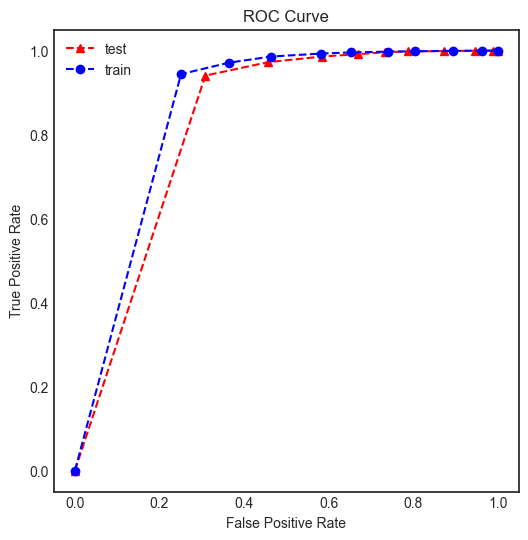

In [39]:
plt.figure(figsize=(6,6))

plt.plot(df_test['FPR'], df_test['TPR'], marker='^', c='red', linestyle='--', label='test')
plt.plot(df_train['FPR'], df_train['TPR'], marker='o', c='blue', linestyle='--', label='train')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Đa lớp

In [40]:
from sklearn.datasets import load_iris, load_wine
X=load_iris().data
y=load_iris().target

In [41]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
for i in range(n_samples):
    for j in range(n_features):
        X[i,j]=X[i,j]+random_state.randn()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [43]:
model = LogisticRegression(multi_class='multinomial')
model.fit(X_train,y_train)
b=model.intercept_
w=model.coef_
print(b)
print(w)

[ 2.98060673  2.02349175 -5.00409848]
[[ 0.14570359  0.84008242 -1.91619159 -0.40885508]
 [-0.19669307 -0.46923679  0.45004096  0.08731467]
 [ 0.05098948 -0.37084563  1.46615063  0.32154041]]


In [44]:
feature_names = load_iris().feature_names
class_names = load_iris().target_names

for class_index, class_name in enumerate(class_names):
    coef = model.coef_[class_index]
    intercept = model.intercept_[class_index]

    logit_eq = f"logit(P(y={class_name})) = {intercept:.3f}"
    for i, c in enumerate(coef):
        logit_eq += f" + ({c:.3f} * {feature_names[i]})"
    print(logit_eq)

print("\nCông thức xác suất:")
print("P(y=k) = exp(logit_k) / (exp(logit_setosa) + exp(logit_versicolor) + exp(logit_virginica))")


logit(P(y=setosa)) = 2.981 + (0.146 * sepal length (cm)) + (0.840 * sepal width (cm)) + (-1.916 * petal length (cm)) + (-0.409 * petal width (cm))
logit(P(y=versicolor)) = 2.023 + (-0.197 * sepal length (cm)) + (-0.469 * sepal width (cm)) + (0.450 * petal length (cm)) + (0.087 * petal width (cm))
logit(P(y=virginica)) = -5.004 + (0.051 * sepal length (cm)) + (-0.371 * sepal width (cm)) + (1.466 * petal length (cm)) + (0.322 * petal width (cm))

Công thức xác suất:
P(y=k) = exp(logit_k) / (exp(logit_setosa) + exp(logit_versicolor) + exp(logit_virginica))


In [45]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
result = pd.DataFrame(X_test, columns=feature_names)

for i, target_name in enumerate(class_names):
    result[f"P({target_name})"] = y_proba[:, i]

result["y_pred"] = [class_names[i] for i in y_pred]
result["y_true"] = [class_names[i] for i in y_test]

result.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),P(setosa),P(versicolor),P(virginica),y_pred,y_true
0,8.403917,1.739984,4.564050,2.336891,1.151705e-03,0.398441,0.600407,virginica,versicolor
1,6.839401,2.565174,2.102342,-0.384810,8.613905e-01,0.132252,0.006357,setosa,setosa
2,7.424329,1.890272,8.638873,3.294394,1.065842e-09,0.010488,0.989512,virginica,virginica
3,4.873174,2.169322,4.115120,1.594352,4.670279e-03,0.737754,0.257576,versicolor,versicolor
4,7.466383,2.339280,3.465742,0.053282,1.337280e-01,0.696837,0.169435,versicolor,versicolor
5,4.705432,3.250365,1.064846,2.249264,9.596481e-01,0.039577,0.000775,setosa,setosa
6,4.874403,1.516636,2.017062,1.910379,2.405189e-01,0.728985,0.030496,versicolor,versicolor
7,6.170955,3.296557,5.454758,2.916887,2.437677e-04,0.258962,0.740794,virginica,virginica
8,8.155912,2.590093,3.847591,1.109047,4.940354e-02,0.610124,0.340472,versicolor,versicolor
9,5.095300,3.643261,4.647188,0.011055,1.909720e-02,0.651603,0.329300,versicolor,versicolor


In [46]:
x_test=X_test[0]
z=np.dot(x_test,w.T)+b
print(z)

[-4.03422701  1.81208945  2.22213756]


In [47]:
proba=np.exp(z)/np.sum(np.exp(z))
print(proba)

[0.0011517  0.39844117 0.60040713]


In [48]:
y_train_pred=model.predict(X_train)
print(confusion_matrix(y_train,y_train_pred))

[[39  1  0]
 [ 2 30  9]
 [ 0 11 28]]


<Figure size 800x800 with 0 Axes>

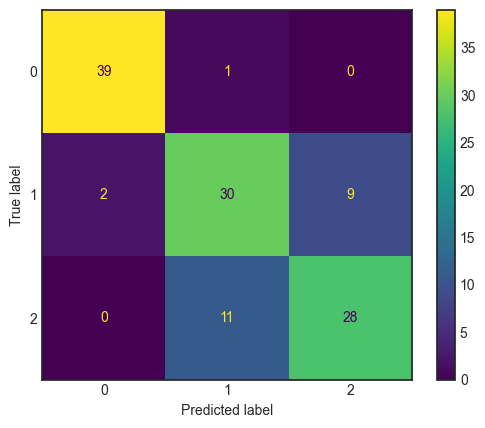

In [49]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)
plt.show()

In [50]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.71      0.73      0.72        41
           2       0.76      0.72      0.74        39

    accuracy                           0.81       120
   macro avg       0.81      0.81      0.81       120
weighted avg       0.81      0.81      0.81       120



In [51]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [52]:
y_train_pred = model.predict_proba(X_train)
y_train_binarize=label_binarize(y_train, classes=[0, 1, 2])

In [53]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_train_binarize[:, i], y_train_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_train_binarize.ravel(), y_train_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

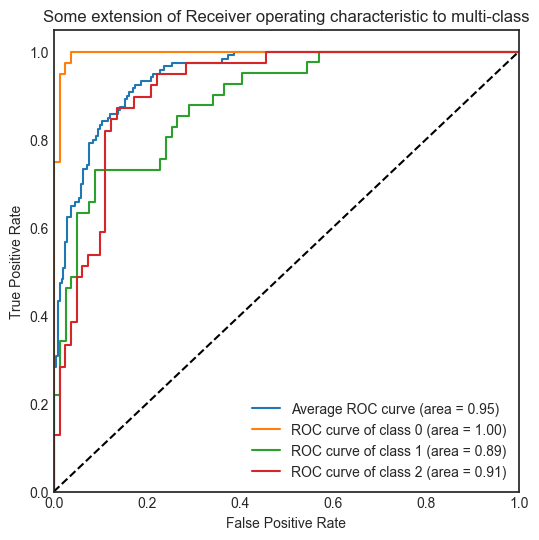

In [54]:
plt.figure(figsize=(6,6))

plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))


for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [55]:
y_test_pred = model.predict_proba(X_test)
y_test_binarize=label_binarize(y_test, classes=[0, 1, 2])

In [56]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i],y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarize.ravel(), y_test_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

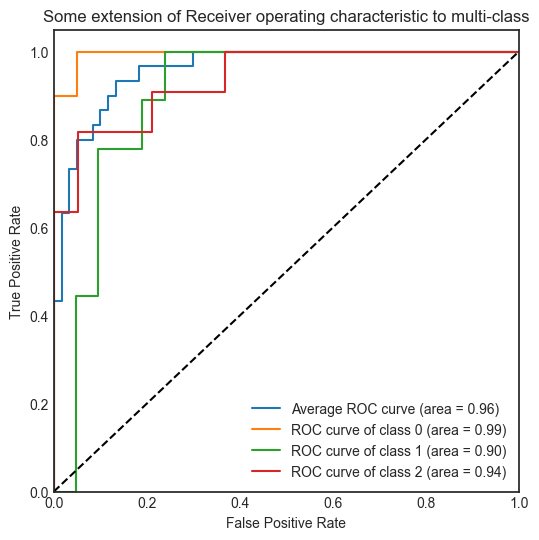

In [57]:
plt.figure(figsize=(6,6))


plt.plot(fpr["micro"], tpr["micro"],
         label='Average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

for i in range(3):
    plt.plot(fpr[i], tpr[i],
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
plt.style.use('seaborn-v0_8-white')

In [59]:
df = pd.read_csv(r"E:\Download_Chrome\data\Default.csv")
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [60]:
df['student2'] = df['student'].factorize()[0]

df['default2'] = df['default'].factorize()[0]

df = df.drop(['default', 'student'], axis=1)

df.head()

,Unnamed: 0,balance,income,student2,default2
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,1,0
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


In [61]:
X = df[['balance', 'income', 'student2']].values
y = df['default2'].values


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [63]:
lda = LinearDiscriminantAnalysis(solver="svd")
lda.fit(X, y)
y_pred = lda.predict(X)

In [64]:
feature_names = ['balance', 'income', 'student2']

eq = f"logit(p) = {lda.intercept_[0]:.3f}"
for i, f in enumerate(feature_names):
    eq += f" + ({lda.coef_[0, i]:.3f} * {f})"
print(eq)

logit(p) = -9.479 + (0.005 * balance) + (0.000 * income) + (-0.366 * student2)


In [65]:
y_pred1 = lda.predict(X_test)
y_proba = lda.predict_proba(X_test)

result = pd.DataFrame(X_test, columns=['balance', 'income', 'student2'])

result['P(default=0)'] = y_proba[:, 0]
result['P(default=1)'] = y_proba[:, 1]
result['Predict'] = y_pred1
result['Actual'] = y_test

result.head(10)

,balance,income,student2,P(default=0),P(default=1),Predict,Actual
0,1435.662933,31507.089277,0.0,0.924334,0.075666,0,0
1,771.789347,42139.070269,0.0,0.996131,0.003869,0,0
2,0.000000,21809.218509,0.0,0.999911,0.000089,0,0
3,113.571264,32803.832648,0.0,0.999836,0.000164,0,0
4,1358.132472,49903.597081,0.0,0.939209,0.060791,0,0
5,1302.553499,32235.052450,0.0,0.957865,0.042135,0,0
6,1763.579088,46227.074542,0.0,0.701847,0.298153,0,1
7,857.329142,25742.173767,0.0,0.994853,0.005147,0,0
8,1366.725774,35425.512077,0.0,0.942644,0.057356,0,0
9,1118.701039,21848.442900,1.0,0.988207,0.011793,0,1


<Figure size 800x800 with 0 Axes>

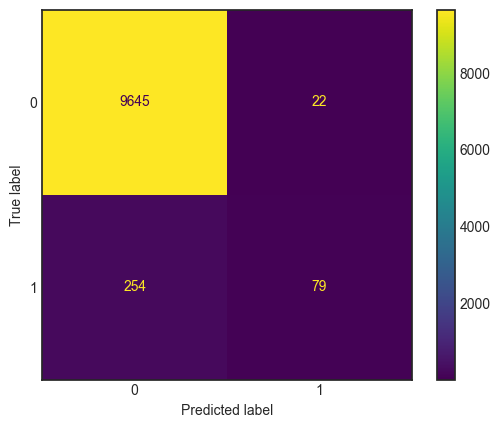

In [66]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(lda,X,y)
plt.show()

In [67]:
print(classification_report(y, y_pred, target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



In [68]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
pred = qda.predict(X)

In [69]:
feature_names = ['balance', 'income', 'student2']

covariances = []
for cls in qda.classes_:
    X_cls = X[y == cls] 
    cov = np.cov(X_cls.T) 
    covariances.append(cov)

for k, cls in enumerate(qda.classes_):
    mu = qda.means_[k]
    cov = covariances[k]
    prior = qda.priors_[k]

    cov_inv = np.linalg.inv(cov)
    term1 = -0.5 * np.log(np.linalg.det(cov))
    term2_const = -0.5 * mu @ cov_inv @ mu
    const = term1 + term2_const + np.log(prior)

    eq = f"δ_{cls}(x) = {const:.3f}"
    linear_terms = cov_inv @ mu
    for i, f in enumerate(feature_names):
        eq += f" + ({linear_terms[i]:.3f} * {f})"
    eq += " - 0.5 * x^T Σ^{-1} x"
    print(eq)

δ_0(x) = -26.444 + (0.004 * balance) + (0.001 * income) + (12.128 * student2) - 0.5 * x^T Σ^{-1} x
δ_1(x) = -40.756 + (0.015 * balance) + (0.001 * income) + (10.758 * student2) - 0.5 * x^T Σ^{-1} x


In [70]:
y_pred2 = qda.predict(X_test)
y_proba = qda.predict_proba(X_test)

result = pd.DataFrame(X_test, columns=['balance', 'income', 'student2'])

result['P(default=0)'] = y_proba[:, 0]
result['P(default=1)'] = y_proba[:, 1]
result['Predict'] = y_pred2
result['Actual'] = y_test

result.head(10)

,balance,income,student2,P(default=0),P(default=1),Predict,Actual
0,1435.662933,31507.089277,0.0,0.912130,8.786954e-02,0,0
1,771.789347,42139.070269,0.0,0.999102,8.976676e-04,0,0
2,0.000000,21809.218509,0.0,0.999999,5.590168e-07,0,0
3,113.571264,32803.832648,0.0,0.999998,1.640693e-06,0,0
4,1358.132472,49903.597081,0.0,0.940294,5.970614e-02,0,0
5,1302.553499,32235.052450,0.0,0.956945,4.305502e-02,0,0
6,1763.579088,46227.074542,0.0,0.641560,3.584405e-01,0,1
7,857.329142,25742.173767,0.0,0.998017,1.983258e-03,0,0
8,1366.725774,35425.512077,0.0,0.936782,6.321830e-02,0,0
9,1118.701039,21848.442900,1.0,0.994587,5.412863e-03,0,1


<Figure size 800x800 with 0 Axes>

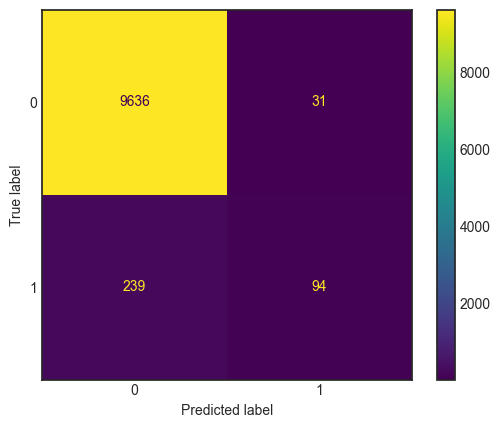

In [71]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(qda,X,y)
plt.show()

In [72]:
print(classification_report(y, y_pred, target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

    accuracy                           0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



In [73]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

In [74]:
X, y = load_iris(return_X_y=True)

In [75]:
gnb = GaussianNB()
gnb.fit(X, y)
y_pred = gnb.predict(X)

In [76]:
feature_names = load_iris().feature_names

for k, cls in enumerate(gnb.classes_):
    prior = gnb.class_prior_[k]
    mu = gnb.theta_[k]
    var = gnb.var_[k]

    print(f"\n📌 Phương trình cho lớp {cls}:")
    eq = f"log P(y={cls}|x) ∝ log({prior:.3f})"
    for j, f in enumerate(feature_names):
        eq += (f" - (({f} - {mu[j]:.3f})^2 / (2*{var[j]:.3f}))"
               f" - 0.5*log(2π*{var[j]:.3f})")
    print(eq)


📌 Phương trình cho lớp 0:
log P(y=0|x) ∝ log(0.333) - ((sepal length (cm) - 5.006)^2 / (2*0.122)) - 0.5*log(2π*0.122) - ((sepal width (cm) - 3.428)^2 / (2*0.141)) - 0.5*log(2π*0.141) - ((petal length (cm) - 1.462)^2 / (2*0.030)) - 0.5*log(2π*0.030) - ((petal width (cm) - 0.246)^2 / (2*0.011)) - 0.5*log(2π*0.011)

📌 Phương trình cho lớp 1:
log P(y=1|x) ∝ log(0.333) - ((sepal length (cm) - 5.936)^2 / (2*0.261)) - 0.5*log(2π*0.261) - ((sepal width (cm) - 2.770)^2 / (2*0.097)) - 0.5*log(2π*0.097) - ((petal length (cm) - 4.260)^2 / (2*0.216)) - 0.5*log(2π*0.216) - ((petal width (cm) - 1.326)^2 / (2*0.038)) - 0.5*log(2π*0.038)

📌 Phương trình cho lớp 2:
log P(y=2|x) ∝ log(0.333) - ((sepal length (cm) - 6.588)^2 / (2*0.396)) - 0.5*log(2π*0.396) - ((sepal width (cm) - 2.974)^2 / (2*0.102)) - 0.5*log(2π*0.102) - ((petal length (cm) - 5.552)^2 / (2*0.298)) - 0.5*log(2π*0.298) - ((petal width (cm) - 2.026)^2 / (2*0.074)) - 0.5*log(2π*0.074)


<Figure size 800x800 with 0 Axes>

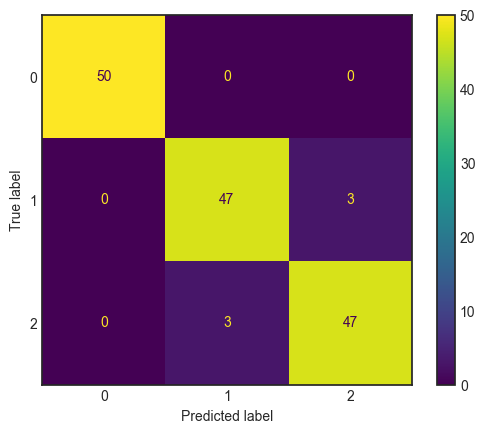

In [77]:
plt.figure(figsize=(8,8))
ConfusionMatrixDisplay.from_estimator(gnb,X,y)
plt.show()

In [78]:
print(classification_report(y, y_pred, target_names=["0","1","2"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

